In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('shopping_trends.csv')
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [4]:
data.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Item Purchased']=le.fit_transform(data['Item Purchased'])
data['Category']=le.fit_transform(data['Category'])
data['Location']=le.fit_transform(data['Location'])
data['Size']=le.fit_transform(data['Size'])
data['Color']=le.fit_transform(data['Color'])
data['Season']=le.fit_transform(data['Season'])
data['Payment Method']=le.fit_transform(data['Payment Method'])
data['Subscription Status']=le.fit_transform(data['Subscription Status'])
data['Shipping Type']=le.fit_transform(data['Shipping Type'])
data['Discount Applied']=le.fit_transform(data['Discount Applied'])
data['Promo Code Used']=le.fit_transform(data['Promo Code Used'])
data['Preferred Payment Method']=le.fit_transform(data['Preferred Payment Method'])
data['Frequency of Purchases']=le.fit_transform(data['Frequency of Purchases'])
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,1,2,1,53,16,0,7,3,3.1,1,2,1,1,1,14,5,3
1,2,19,1,23,1,64,18,0,12,3,3.1,1,0,1,1,1,2,1,3
2,3,50,1,11,1,73,20,2,12,1,3.1,1,1,2,1,1,23,2,6
3,4,21,1,14,2,90,38,1,12,1,3.5,1,4,3,1,1,49,4,6
4,5,45,1,2,1,49,36,1,21,1,2.7,1,1,2,1,1,31,4,0


In [6]:
x=data.iloc[:,:-1]
x.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method
0,1,55,1,2,1,53,16,0,7,3,3.1,1,2,1,1,1,14,5
1,2,19,1,23,1,64,18,0,12,3,3.1,1,0,1,1,1,2,1
2,3,50,1,11,1,73,20,2,12,1,3.1,1,1,2,1,1,23,2
3,4,21,1,14,2,90,38,1,12,1,3.5,1,4,3,1,1,49,4
4,5,45,1,2,1,49,36,1,21,1,2.7,1,1,2,1,1,31,4


In [7]:
y=data.iloc[:,-1:]
y.head()

,Frequency of Purchases
0,3
1,3
2,6
3,6
4,0


array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Item Purchased'}>],
       [<Axes: title={'center': 'Category'}>,
        <Axes: title={'center': 'Purchase Amount (USD)'}>,
        <Axes: title={'center': 'Location'}>,
        <Axes: title={'center': 'Size'}>],
       [<Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Season'}>,
        <Axes: title={'center': 'Review Rating'}>,
        <Axes: title={'center': 'Subscription Status'}>],
       [<Axes: title={'center': 'Payment Method'}>,
        <Axes: title={'center': 'Shipping Type'}>,
        <Axes: title={'center': 'Discount Applied'}>,
        <Axes: title={'center': 'Promo Code Used'}>],
       [<Axes: title={'center': 'Previous Purchases'}>,
        <Axes: title={'center': 'Preferred Payment Method'}>,
        <Axes: title={'center': 'Frequency of Purchases'}>, <Axes: >]],
      dtype=object)

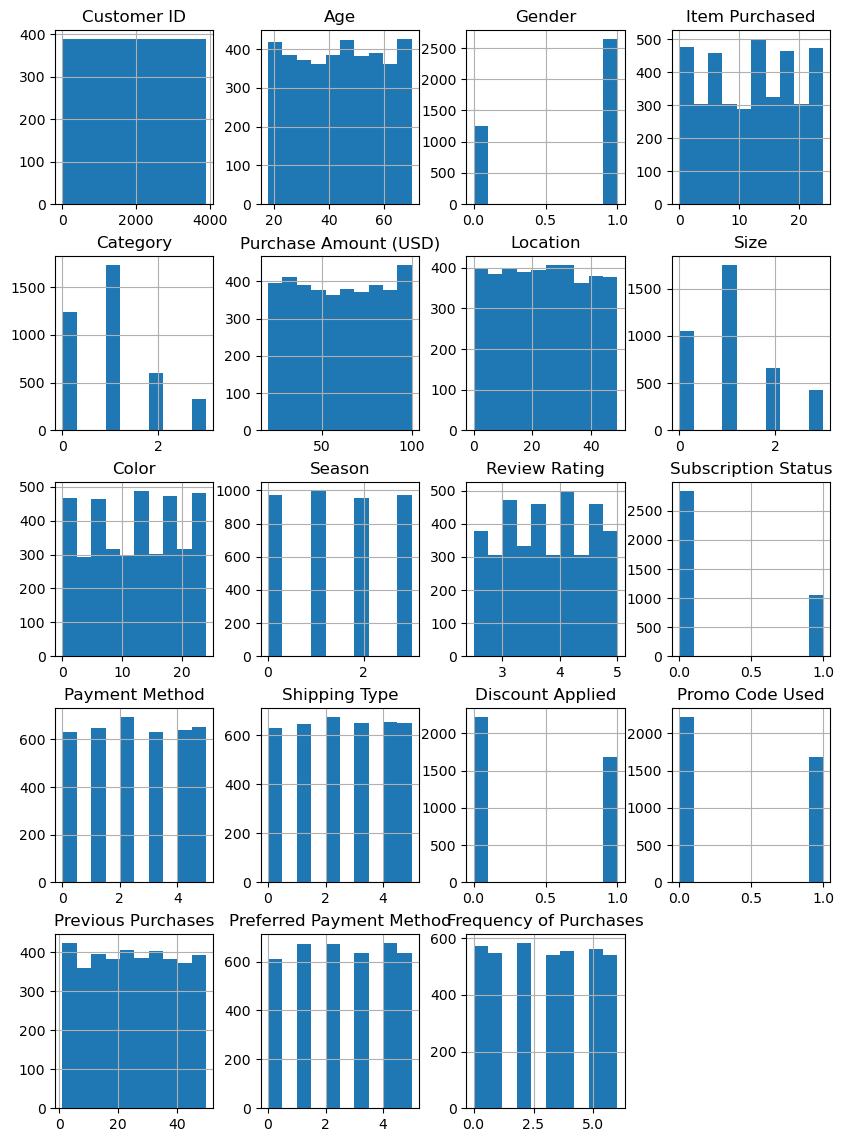

In [14]:
data.hist(figsize=(10,14))

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (2925, 18)

Training data-y- Shape:	 (2925, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (975, 18)

Testing data(y-Outcome) Shape:	 (975, 1)


In [19]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion="gini")
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')

print('='*100)

****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [6 4 0 6 3 4 1 2 1 1 2 3 6 3 6 6 5 5 3 4 6 0 4 3 3 2 5 4 2 3 2 4 1 5 1 6 3
 6 3 3 1 5 2 6 1 4 3 3 2 3 4 2 4 4 2 5 0 6 5 3 0 5 1 0 3 4 0 0 5 4 1 1 2 5
 5 0 3 5 1 1 0 4 6 6 2 6 1 5 0 6 3 5 0 5 4 3 3 3 4 2 0 0 1 5 2 3 3 1 5 0 1
 6 5 4 3 1 4 0 5 3 2 0 4 0 2 3 1 3 6 0 5 3 4 1 6 0 1 0 0 2 6 1 6 3 2 3 1 1
 1 4 5 5 0 0 2 6 3 6 2 1 4 1 0 0 2 1 0 2 2 0 2 5 2 2 6 4 0 5 2 2 4 0 4 3 1
 5 3 3 2 4 4 

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)

****************************************************************************************************
Decison Tree - Performance Measures
****************************************************************************************************
Accuracy Score:	 0.13846153846153847
Confusion Matric:
 [[17 24 29 11 17 20 23]
 [15 20 21 23 18 23 17]
 [21 14 19 24 25 29 17]
 [18 24 22 24 24 20 21]
 [20 12 17 19 16 17 20]
 [21 16 25 17 14 18 16]
 [24 16 23 20 22 21 21]]
Classification Report
               precision    recall  f1-score   support

           0       0.12      0.12      0.12       141
           1       0.16      0.15      0.15       137
           2       0.12      0.13      0.12       149
           3       0.17      0.16      0.16       153
           4       0.12      0.13      0.12       121
           5       0.12      0.14      0.13       127
           6       0.16      0.14      0.15       147

    accuracy                           0.14       975
   macro avg       0.14   

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest, ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()
print('Variance Score:\t', explained_variance_score (ytest,ypred))


print()
print('R-Square: \t', r2_score (ytest, ypred))

Mean Squared Error: 	 8.089230769230769

RMSE: 	 2.8441573038829566

Variance Score:	 -1.0128101802757157

R-Square: 	 -1.01349122186874


[Text(0.35526282277533844, 0.9833333333333333, 'x[16] <= 21.5\ngini = 0.857\nsamples = 2925\nvalue = [431, 410, 435, 389, 432, 436, 392]'),
 Text(0.1148271173140563, 0.95, 'x[0] <= 224.0\ngini = 0.856\nsamples = 1236\nvalue = [189, 177, 213, 155, 177, 154, 171]'),
 Text(0.01235532651854355, 0.9166666666666666, 'x[5] <= 83.5\ngini = 0.825\nsamples = 63\nvalue = [12, 1, 7, 13, 6, 10, 14]'),
 Text(0.005111092337585537, 0.8833333333333333, 'x[7] <= 2.5\ngini = 0.798\nsamples = 45\nvalue = [5, 0, 3, 11, 6, 7, 13]'),
 Text(0.004435245416913069, 0.85, 'x[6] <= 7.5\ngini = 0.787\nsamples = 42\nvalue = [5, 0, 3, 11, 6, 4, 13]'),
 Text(0.002027540762017403, 0.8166666666666667, 'x[9] <= 1.5\ngini = 0.571\nsamples = 7\nvalue = [0, 0, 1, 4, 2, 0, 0]'),
 Text(0.0013516938413449353, 0.7833333333333333, 'x[0] <= 166.5\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 1, 4, 0, 0, 0]'),
 Text(0.0006758469206724676, 0.75, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0, 0]'),
 Text(0.002027540762017403, 0.75

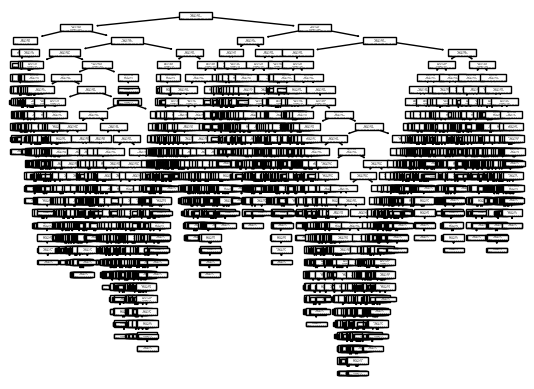

In [25]:
from sklearn import tree
tree.plot_tree(dt_clf)

[Text(0.35526282277533844, 0.9833333333333333, 'x[16] <= 21.5\ngini = 0.857\nsamples = 2925\nvalue = [431, 410, 435, 389, 432, 436, 392]'),
 Text(0.1148271173140563, 0.95, 'x[0] <= 224.0\ngini = 0.856\nsamples = 1236\nvalue = [189, 177, 213, 155, 177, 154, 171]'),
 Text(0.01235532651854355, 0.9166666666666666, 'x[5] <= 83.5\ngini = 0.825\nsamples = 63\nvalue = [12, 1, 7, 13, 6, 10, 14]'),
 Text(0.005111092337585537, 0.8833333333333333, 'x[7] <= 2.5\ngini = 0.798\nsamples = 45\nvalue = [5, 0, 3, 11, 6, 7, 13]'),
 Text(0.004435245416913069, 0.85, 'x[6] <= 7.5\ngini = 0.787\nsamples = 42\nvalue = [5, 0, 3, 11, 6, 4, 13]'),
 Text(0.002027540762017403, 0.8166666666666667, 'x[9] <= 1.5\ngini = 0.571\nsamples = 7\nvalue = [0, 0, 1, 4, 2, 0, 0]'),
 Text(0.0013516938413449353, 0.7833333333333333, 'x[0] <= 166.5\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 1, 4, 0, 0, 0]'),
 Text(0.0006758469206724676, 0.75, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0, 0]'),
 Text(0.002027540762017403, 0.75

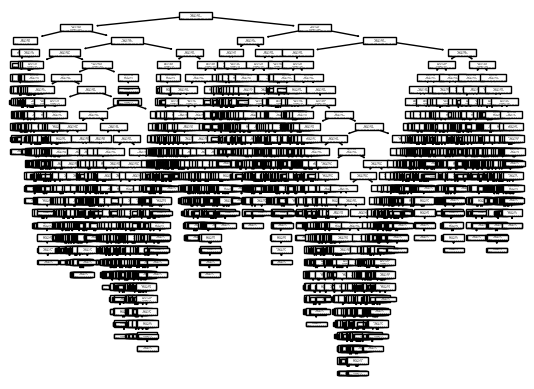

In [28]:
from sklearn.model_selection import GridSearchCV
tree.plot_tree(dt_clf)

In [31]:
dt_clf.feature_names_in_

array(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method'], dtype=object)

In [34]:
pruned_tree = DecisionTreeClassifier(ccp_alpha=0.01)  
pruned_tree.fit(xtrain, ytrain)
y_pruned = pruned_tree.predict(xtest)
prunedacc = accuracy_score(ytest, y_pruned)
print("Accuracy after pruning:", prunedacc)

Accuracy after pruning: 0.13025641025641024
